In [94]:
import pandas as pd

# Load the dataset
df = pd.read_csv("personality_dataset.csv")

# Display first 5 rows
df.head()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [95]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [96]:
df.isnull().sum()


Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [97]:
# Check how many missing values exist in each column
print("Missing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


In [98]:
# Fill missing numeric values with the column-wise mean
# This prevents dropping rows and helps retain dataset size
df = df.fillna(df.mean(numeric_only=True))

In [99]:
# Check again to confirm all missing values are handled
print("\nMissing values after filling with mean:")
print(df.isnull().sum())


Missing values after filling with mean:
Time_spent_Alone              0
Stage_fear                   73
Social_event_attendance       0
Going_outside                 0
Drained_after_socializing    52
Friends_circle_size           0
Post_frequency                0
Personality                   0
dtype: int64


In [100]:
# Check column data types
print(df.dtypes)


Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object


In [101]:
# Fill missing values for categorical columns using mode (most frequent value)
df['Stage_fear'] = df['Stage_fear'].fillna(df['Stage_fear'].mode()[0])
df['Drained_after_socializing'] = df['Drained_after_socializing'].fillna(df['Drained_after_socializing'].mode()[0])

In [102]:
# Check again to confirm all missing values are handled
print("\nMissing values after filling with mean:")
print(df.isnull().sum())


Missing values after filling with mean:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


In [103]:
# Loop through each column and print unique values and counts
for col in df.columns:
    print(f"\n🔹 Column: {col}")
    print("Unique Values:", df[col].unique())
    print("Value Counts:")
    print(df[col].value_counts())



🔹 Column: Time_spent_Alone
Unique Values: [ 4.        9.        0.        3.        1.        2.       10.
  6.        5.        8.        4.505816  7.       11.      ]
Value Counts:
Time_spent_Alone
0.000000     369
2.000000     357
3.000000     353
1.000000     326
9.000000     206
10.000000    196
4.000000     190
7.000000     190
5.000000     180
8.000000     180
6.000000     150
11.000000    140
4.505816      63
Name: count, dtype: int64

🔹 Column: Stage_fear
Unique Values: ['No' 'Yes']
Value Counts:
Stage_fear
No     1490
Yes    1410
Name: count, dtype: int64

🔹 Column: Social_event_attendance
Unique Values: [ 4.          0.          1.          6.          9.          7.
  8.          3.          5.          2.         10.          3.96335447]
Value Counts:
Social_event_attendance
2.000000     408
0.000000     378
1.000000     322
3.000000     317
4.000000     255
6.000000     239
7.000000     239
9.000000     236
5.000000     224
8.000000     206
3.963354      62
10.000000    

In [104]:
# Show unique values and counts for categorical features
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\n🔸 Categorical Column: {col}")
    print("Unique Values:", df[col].unique())
    print("Value Counts:")
    print(df[col].value_counts())



🔸 Categorical Column: Stage_fear
Unique Values: ['No' 'Yes']
Value Counts:
Stage_fear
No     1490
Yes    1410
Name: count, dtype: int64

🔸 Categorical Column: Drained_after_socializing
Unique Values: ['No' 'Yes']
Value Counts:
Drained_after_socializing
No     1493
Yes    1407
Name: count, dtype: int64

🔸 Categorical Column: Personality
Unique Values: ['Extrovert' 'Introvert']
Value Counts:
Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64


In [105]:
# Basic descriptive statistics
df.describe()


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [106]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Display correlation matrix
print(corr_matrix)


                         Time_spent_Alone  Social_event_attendance  \
Time_spent_Alone                 1.000000                -0.718139   
Social_event_attendance         -0.718139                 1.000000   
Going_outside                   -0.735247                 0.731941   
Friends_circle_size             -0.701665                 0.718518   
Post_frequency                  -0.718072                 0.727732   

                         Going_outside  Friends_circle_size  Post_frequency  
Time_spent_Alone             -0.735247            -0.701665       -0.718072  
Social_event_attendance       0.731941             0.718518        0.727732  
Going_outside                 1.000000             0.718327        0.754758  
Friends_circle_size           0.718327             1.000000        0.690381  
Post_frequency                0.754758             0.690381        1.000000  


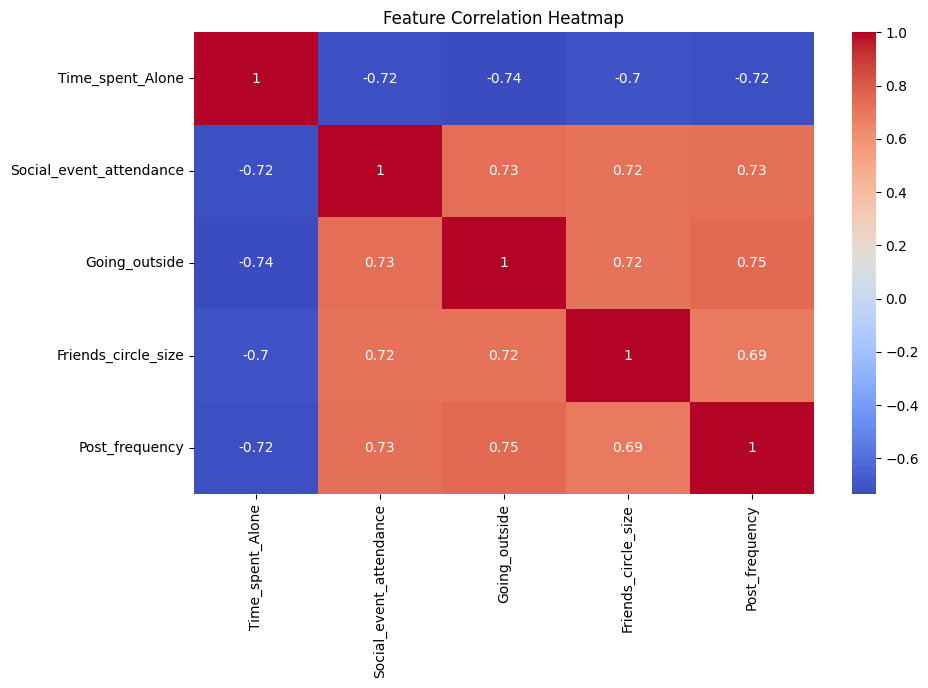

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [108]:


from scipy.stats import skew, kurtosis

for col in df.select_dtypes(include='float64').columns:
    print(f"{col} → Skewness: {skew(df[col])}, Kurtosis: {kurtosis(df[col])}")


Time_spent_Alone → Skewness: 0.3898755104098153, Kurtosis: -1.1203693448322292
Social_event_attendance → Skewness: 0.29778622003923483, Kurtosis: -1.1032833885729205
Going_outside → Skewness: 0.19502135682551341, Kurtosis: -1.219646236411316
Friends_circle_size → Skewness: 0.4305794970428016, Kurtosis: -0.9727985233212015
Post_frequency → Skewness: 0.47966534576189623, Kurtosis: -1.031402035088865


In [109]:
# Mean values for each personality group
df.groupby("Personality").mean(numeric_only=True)


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Personality,,,,,
Extrovert,2.122869,5.977850,4.596244,9.095744,5.592647
Introvert,7.027444,1.831621,1.310859,3.277465,1.418787


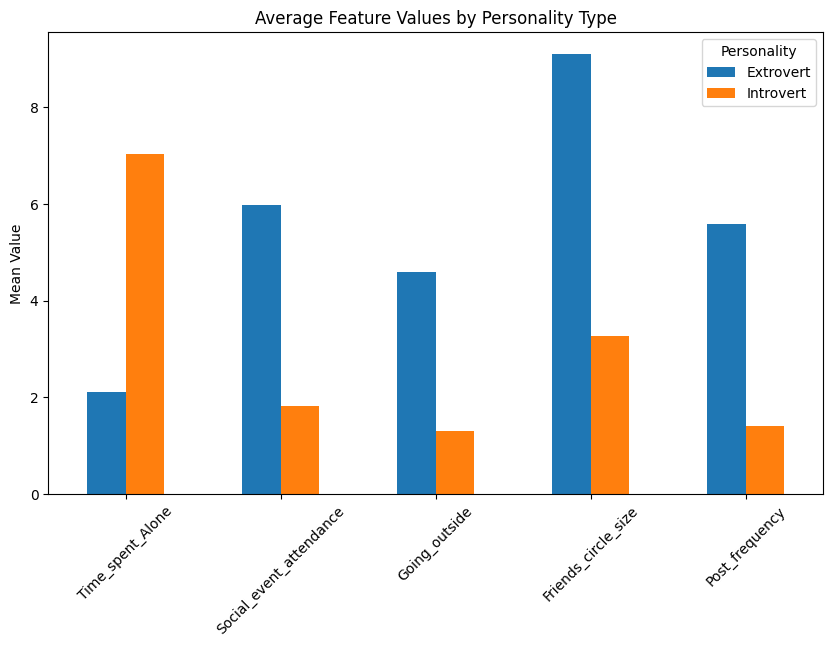

In [110]:
df.groupby("Personality").mean(numeric_only=True).T.plot(kind='bar', figsize=(10, 6))
plt.title("Average Feature Values by Personality Type")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.show()


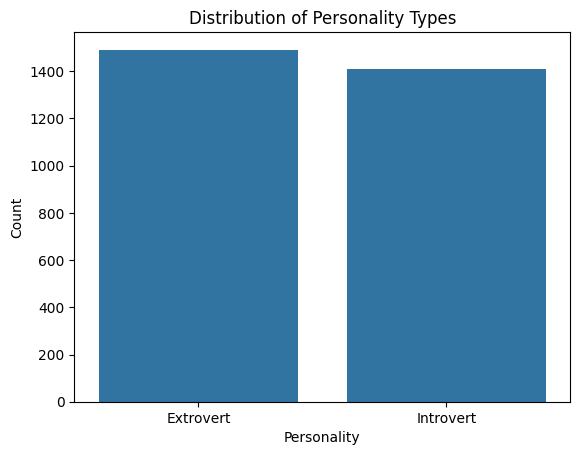

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Personality')
plt.title("Distribution of Personality Types")
plt.ylabel("Count")
plt.show()


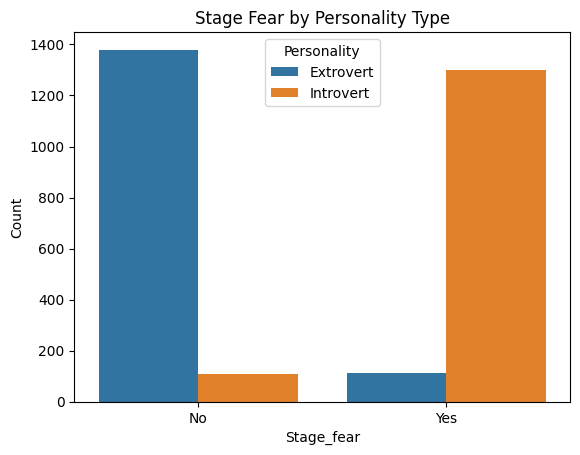

In [112]:
# Stage Fear vs Personality
sns.countplot(data=df, x='Stage_fear', hue='Personality')
plt.title("Stage Fear by Personality Type")
plt.ylabel("Count")
plt.show()



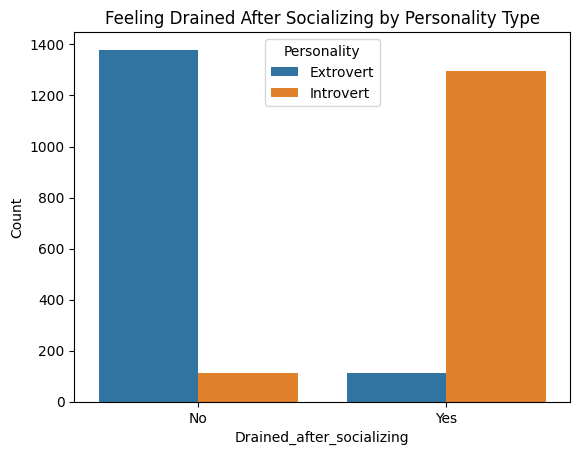

In [113]:
# Drained After Socializing vs Personality
sns.countplot(data=df, x='Drained_after_socializing', hue='Personality')
plt.title("Feeling Drained After Socializing by Personality Type")
plt.ylabel("Count")
plt.show()


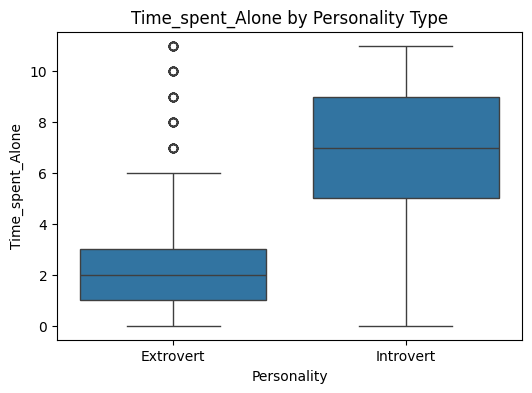

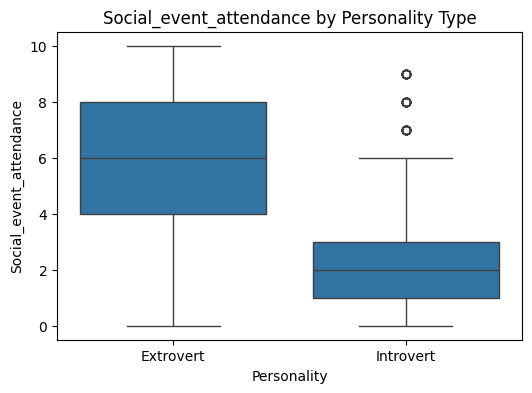

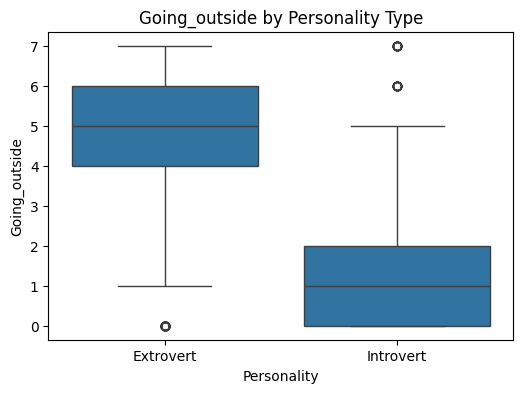

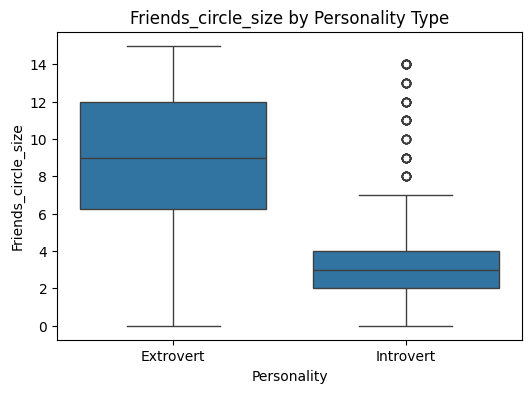

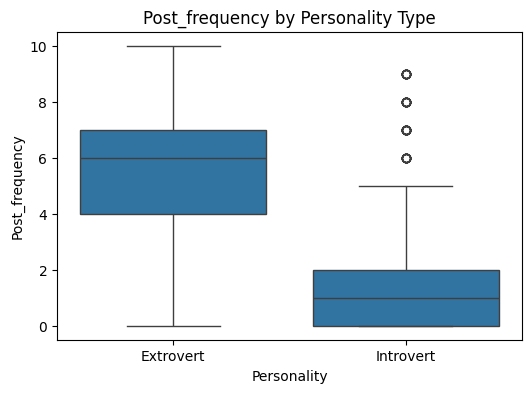

In [114]:
# Loop through each numeric column
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                'Friends_circle_size', 'Post_frequency']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Personality', y=col)
    plt.title(f"{col} by Personality Type")
    plt.show()


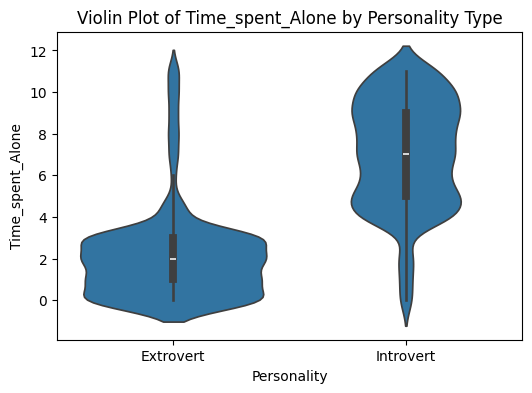

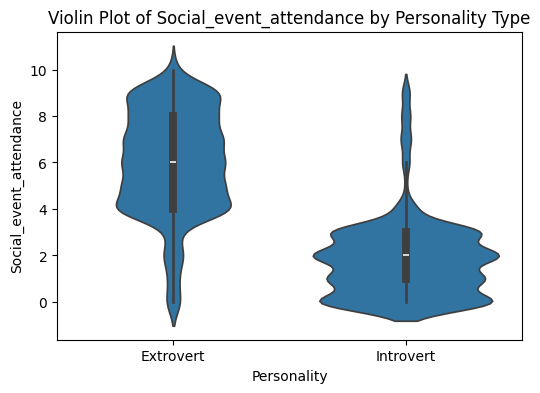

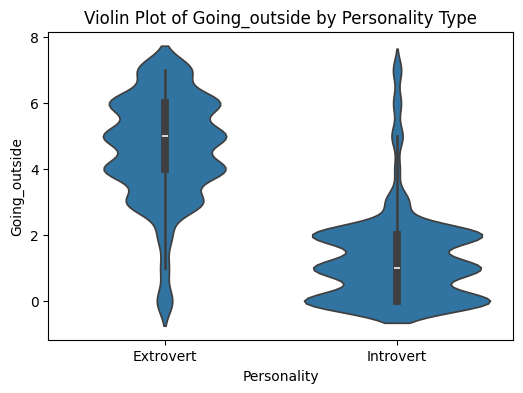

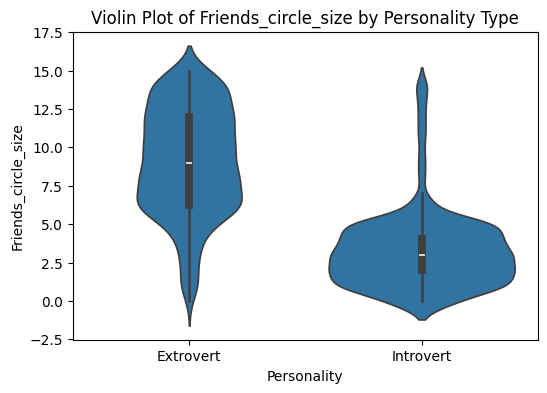

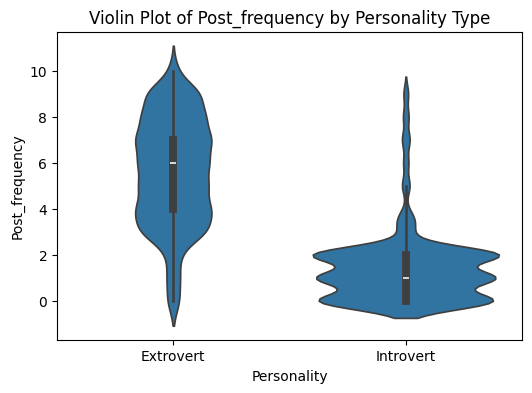

In [115]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(data=df, x='Personality', y=col)
    plt.title(f"Violin Plot of {col} by Personality Type")
    plt.show()


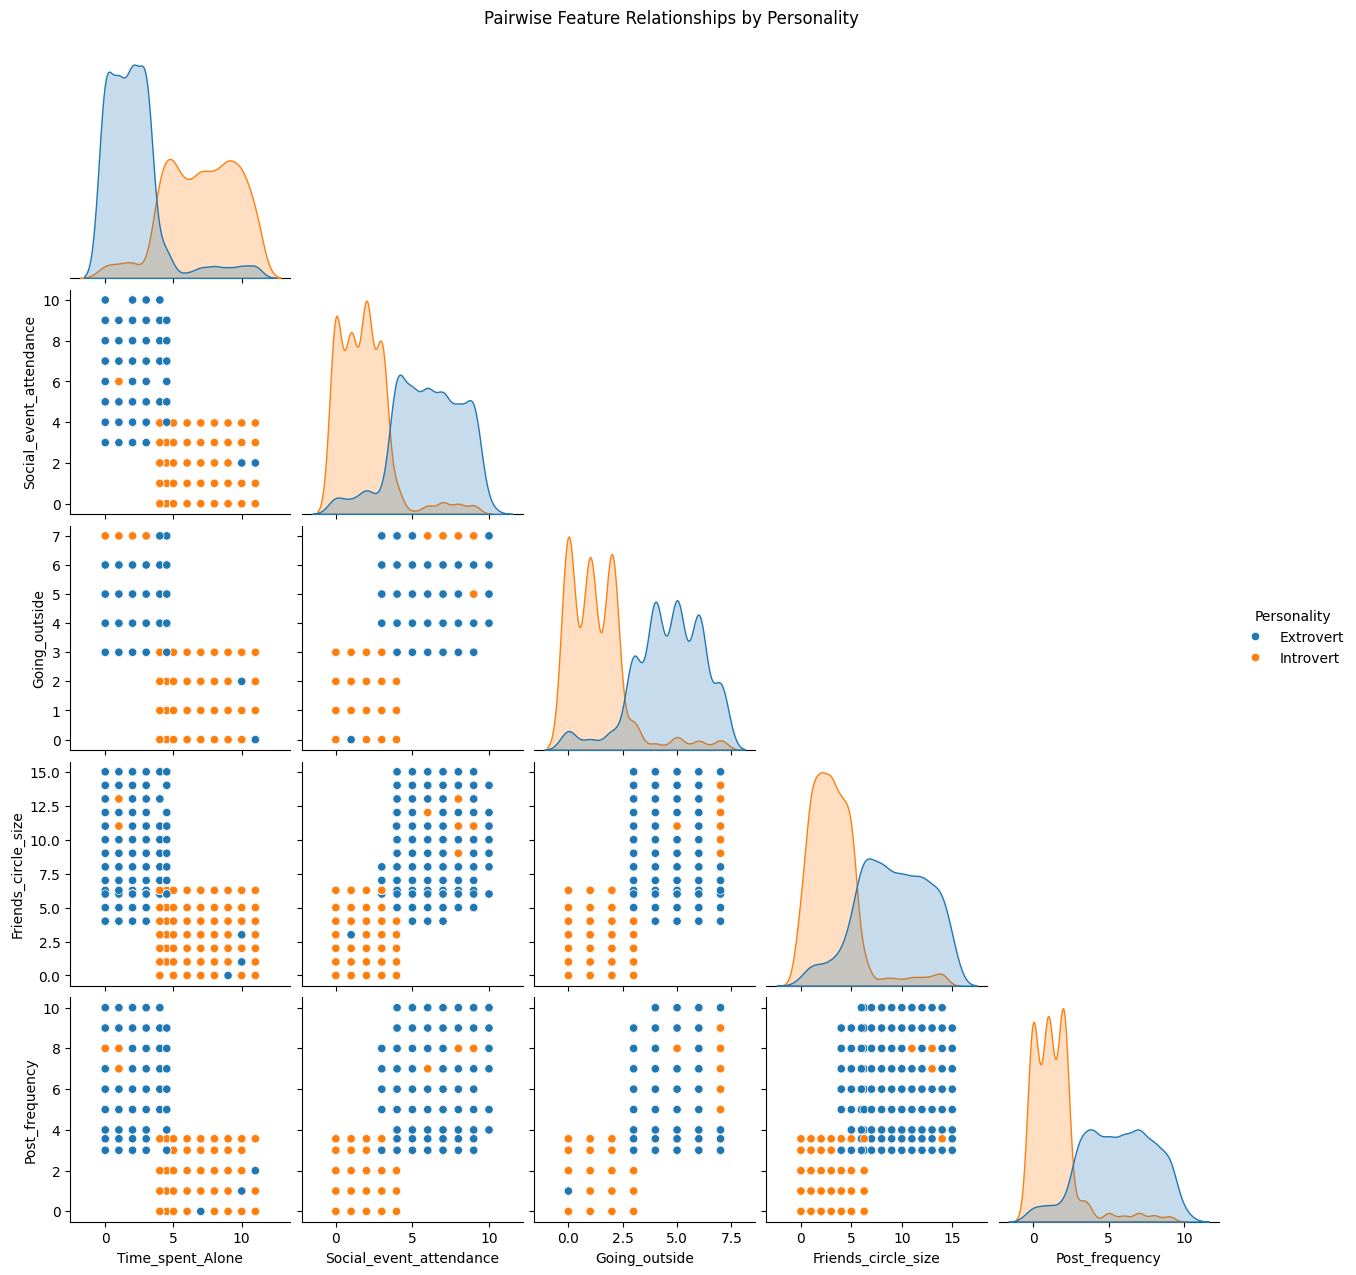

In [116]:
sns.pairplot(df, hue='Personality', diag_kind='kde', corner=True)
plt.suptitle("Pairwise Feature Relationships by Personality", y=1.02)
plt.show()


In [117]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect and count outliers for each numeric column
for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col} → Outliers Detected: {len(outliers)}")


Time_spent_Alone → Outliers Detected: 0
Social_event_attendance → Outliers Detected: 0
Going_outside → Outliers Detected: 0
Friends_circle_size → Outliers Detected: 0
Post_frequency → Outliers Detected: 0


In [118]:
# binary encode 

df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})


In [119]:
#target encoding 
df['Personality'] = df['Personality'].map({'Extrovert': 1, 'Introvert': 0})


In [120]:
print(df.dtypes)


Time_spent_Alone             float64
Stage_fear                     int64
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing      int64
Friends_circle_size          float64
Post_frequency               float64
Personality                    int64
dtype: object


model training in random forest to find the best feature to use for prediction.

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split
X = df.drop("Personality", axis=1)
y = df["Personality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Get feature importance
importances = rf.feature_importances_
feature_names = X.columns

# Display as a DataFrame
import pandas as pd
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(importance_df)


                     Feature  Importance
1                 Stage_fear    0.213220
4  Drained_after_socializing    0.183548
0           Time_spent_Alone    0.181095
2    Social_event_attendance    0.153232
6             Post_frequency    0.107911
3              Going_outside    0.098428
5        Friends_circle_size    0.062565


In [122]:
# removing friends_circle_size since it's not very important

In [123]:
# Drop 'Friends_circle_size'
X = df.drop(columns=['Personality', 'Friends_circle_size'])
y = df['Personality']

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Drop target + low-importance feature
X = df.drop(columns=['Personality', 'Friends_circle_size'])
y = df['Personality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Evaluation
print("📊 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


📊 Logistic Regression Results
Accuracy: 0.9275862068965517
Confusion Matrix:
 [[260  18]
 [ 24 278]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       278
           1       0.94      0.92      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



/Users/prakashsilwal/jupyter_env/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/prakashsilwal/jupyter_env/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/prakashsilwal/jupyter_env/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/prakashsilwal/jupyter_env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/prakashsilwal/jupyter_env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/prakashsilwal/jupyter_env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: Run

In [125]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN (uses scaled data)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate
print("📊 KNN Results")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


📊 KNN Results
Accuracy: 0.9293103448275862
Confusion Matrix:
 [[261  17]
 [ 24 278]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       278
           1       0.94      0.92      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



In [126]:
from sklearn.svm import SVC

# Train SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Evaluate
print("📊 SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


📊 SVM Results
Accuracy: 0.9293103448275862
Confusion Matrix:
 [[261  17]
 [ 24 278]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       278
           1       0.94      0.92      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



In [127]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Convert to DMatrix (optional but efficient)
model_xgb = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate
print("📊 XGBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


/Users/prakashsilwal/jupyter_env/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:39:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 XGBoost Results
Accuracy: 0.9275862068965517
Confusion Matrix:
 [[262  16]
 [ 26 276]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       278
           1       0.95      0.91      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



In [128]:
!pip install xgboost


In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluate
print("📊 Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


📊 Decision Tree Results
Accuracy: 0.9155172413793103
Confusion Matrix:
 [[264  14]
 [ 35 267]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92       278
           1       0.95      0.88      0.92       302

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



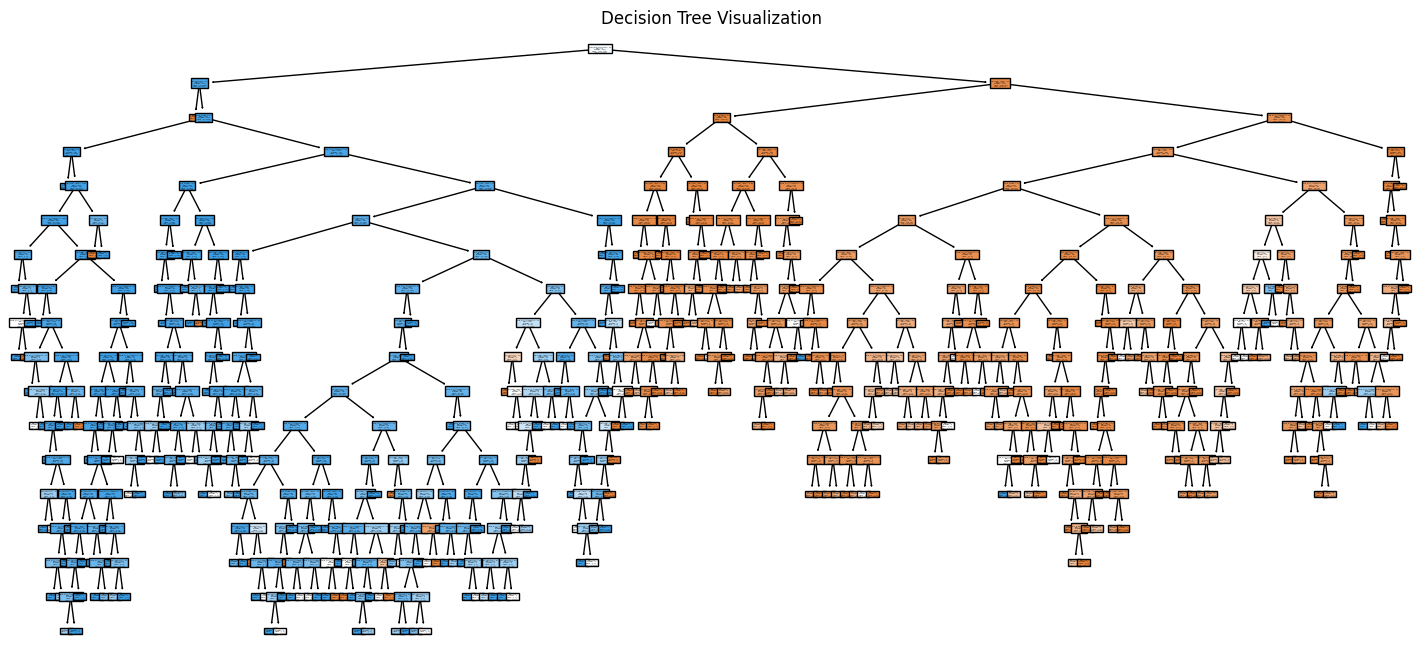

In [130]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plot_tree(dt, feature_names=X.columns, class_names=["Introvert", "Extrovert"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [131]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_model(name, y_true, y_pred, return_results=False):
    """
    Prints model performance metrics:
    - Accuracy
    - Confusion matrix
    - Classification report
    
    Optionally returns metrics for summary tables.
    """
    print(f"\n📊 {name} Results")
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    cr = classification_report(y_true, y_pred, digits=3)
    
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", cr)
    
    if return_results:
        return {
            "Model": name,
            "Accuracy": acc,
            "Confusion Matrix": cm,
            "Classification Report": cr
        }


In [132]:
# Evaluate each model and collect results
results_lr = evaluate_model("Logistic Regression", y_test, y_pred_lr, return_results=True)
results_rf = evaluate_model("Random Forest", y_test, y_pred_rf, return_results=True)
results_xgb = evaluate_model("XGBoost", y_test, y_pred_xgb, return_results=True)
results_dt = evaluate_model("Decision Tree", y_test, y_pred_dt, return_results=True)



📊 Logistic Regression Results
Accuracy: 0.9276
Confusion Matrix:
 [[260  18]
 [ 24 278]]
Classification Report:
               precision    recall  f1-score   support

           0      0.915     0.935     0.925       278
           1      0.939     0.921     0.930       302

    accuracy                          0.928       580
   macro avg      0.927     0.928     0.928       580
weighted avg      0.928     0.928     0.928       580


📊 Random Forest Results
Accuracy: 0.9224
Confusion Matrix:
 [[259  19]
 [ 26 276]]
Classification Report:
               precision    recall  f1-score   support

           0      0.909     0.932     0.920       278
           1      0.936     0.914     0.925       302

    accuracy                          0.922       580
   macro avg      0.922     0.923     0.922       580
weighted avg      0.923     0.922     0.922       580


📊 XGBoost Results
Accuracy: 0.9276
Confusion Matrix:
 [[262  16]
 [ 26 276]]
Classification Report:
               precisio

/var/folders/9l/ybd9b8g910xgq507v8q5cgp00000gn/T/ipykernel_91810/835388112.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=model_names, y=accuracies, palette="crest")
/var/folders/9l/ybd9b8g910xgq507v8q5cgp00000gn/T/ipykernel_91810/835388112.py:25: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/prakashsilwal/jupyter_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


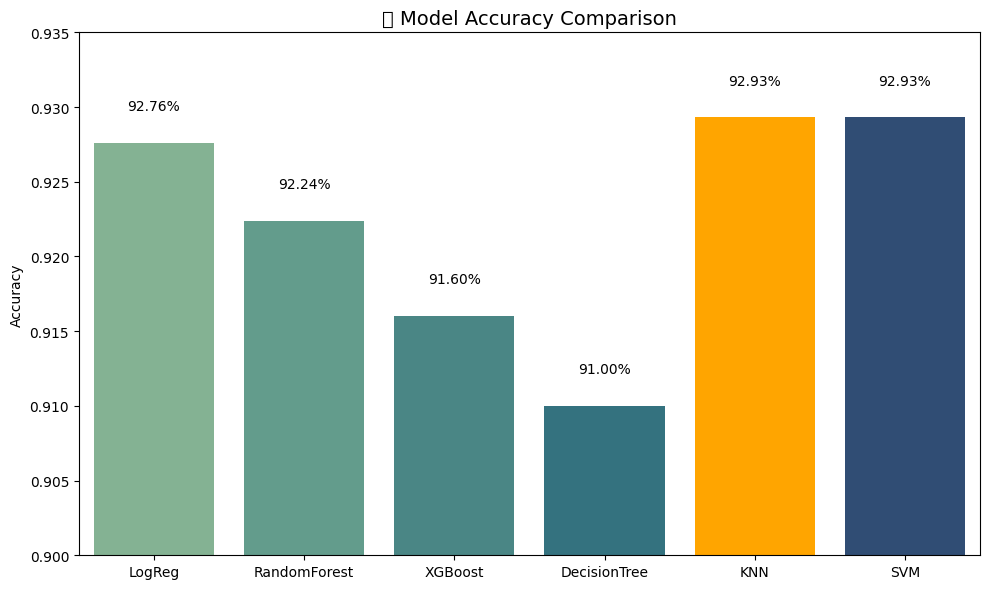

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
model_names = ['LogReg', 'RandomForest', 'XGBoost', 'DecisionTree', 'KNN', 'SVM']
accuracies = [0.9276, 0.9224, 0.9160, 0.9100, 0.9293, 0.9293]

# Plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=model_names, y=accuracies, palette="crest")

# Annotate bars
for bar, acc in zip(bars.patches, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002,
             f"{acc*100:.2f}%", ha='center', va='bottom', fontsize=10)

# Highlight best model bar
best_index = accuracies.index(max(accuracies))
bars.patches[best_index].set_facecolor('orange')

# Finalize chart
plt.title("🔍 Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0.9, 0.935)
plt.tight_layout()
plt.show()
